In [1]:
import os

import pandas as pd
import numpy as np
import math

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD


## Original

In [2]:
#original
def prepare_data():
    ntot = 100
    ntrain = int(0.75*100)
    ntest = int(0.15*100)
    x = np.random.rand(ntot,1)*2*np.pi
    #x = np.linspace(0.0 , 2.0 * np.pi, ntot).reshape(-1, 1)
    s=np.random.normal(0,0.1,size = (100,1))
    print(s.shape)
    print(x.shape)
    y=np.sin(x)+s
    xtrain, xtest = x[:ntrain], x[ntest:]
    ytrain, ytest = y[:ntrain], y[ntest:]
    plt.plot(xtrain.T,ytrain.T,color = 'red', marker = "o")
    plt.title("seno")
    plt.xlabel("Angulo")
    plt.ylabel("Seno")
    plt.grid()
    plt.show()
    return xtrain, ytrain, xtest, ytest

In [3]:
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
    model = Sequential([Dense(10, activation='tanh', input_dim=1),
                        Dense(1, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=75, verbose=0, callbacks=[early_stop])
    #history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0)

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

In [4]:
def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
    model = Sequential([Dense(100, activation='relu', input_dim=1),
                        Dense(1, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0, callbacks=[early_stop])

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

In [5]:
def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
    #model = Sequential([Dense(10, activation='tanh', input_dim=1),
    model = Sequential([Dense(100, activation='relu', input_dim=1),
                        Dense(64, activation='relu'),
                        Dense(1)
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0, callbacks=[early_stop])

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

(100, 1)
(100, 1)


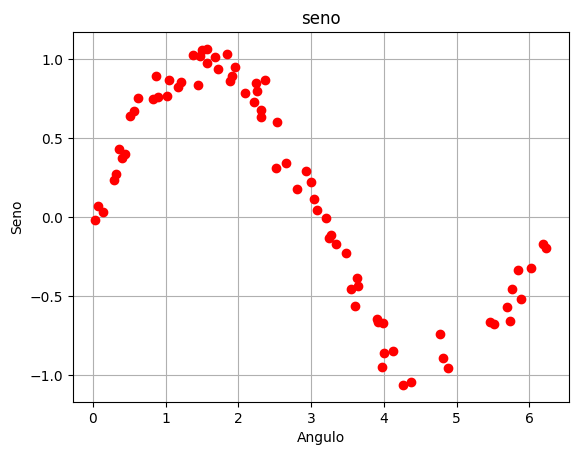

In [6]:
xtrain, ytrain, xtest, ytest = prepare_data()

scaler = preprocessing.MinMaxScaler()
# fit using the train set
scaler.fit(xtrain)
# transform the test test
xtrainN = scaler.transform(xtrain)
xtestN = scaler.transform(xtest) 

X = np.linspace(0.0 , 2.0 * np.pi, 360).reshape(-1, 1)
XN = scaler.transform(X)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

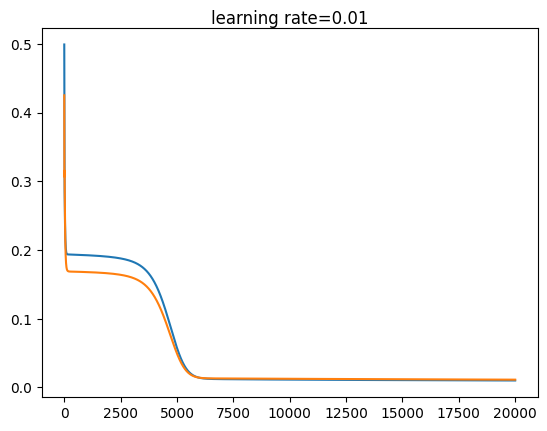

In [7]:
model1 = fit_model1(xtrainN, ytrain, xtestN, ytest, 20000, 0.01, 0.8, 100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


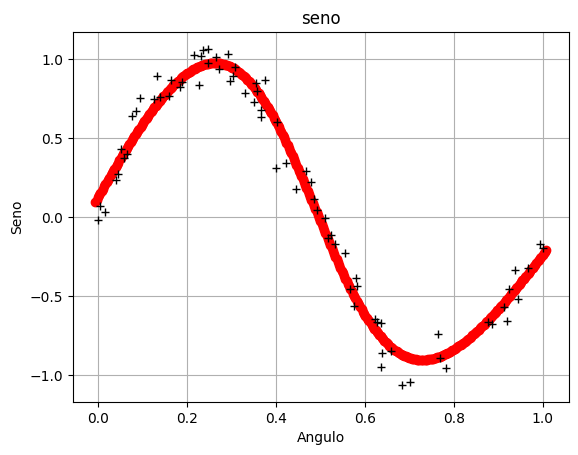

In [8]:
Y = model1.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

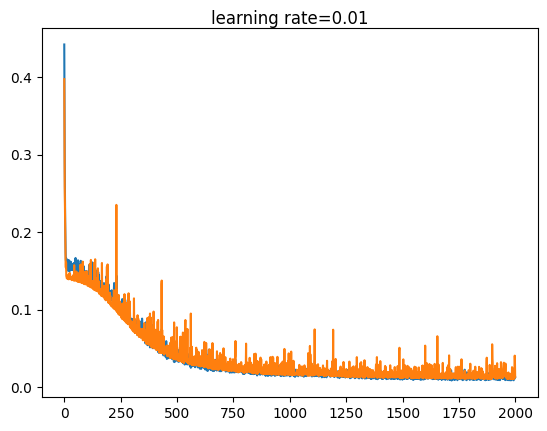

In [9]:
model2 = fit_model2(xtrainN, ytrain, xtestN, ytest, 2000, 0.01, 0.8, 100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


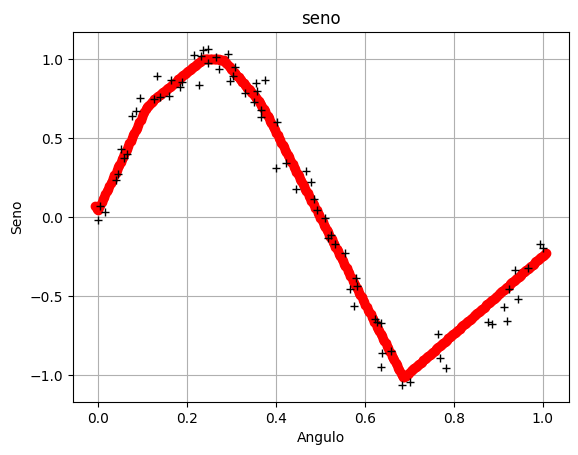

In [10]:
Y = model2.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,729 (26.29 KB)

 Trainable params: 6,729 (26.29 KB)

 Non-trainable params: 0 (0.00 B)

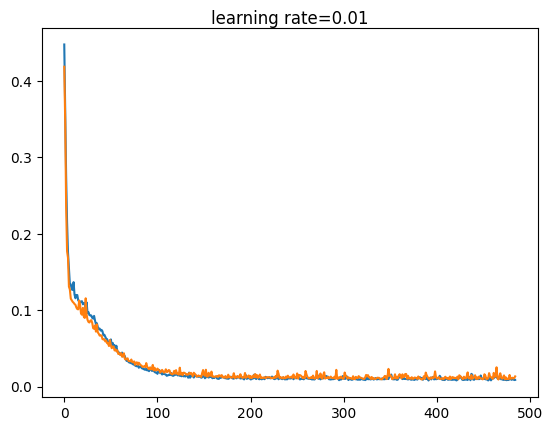

In [11]:
model3 = fit_model3(xtrainN, ytrain, xtestN, ytest, 2000, 0.01, 0.8, 100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


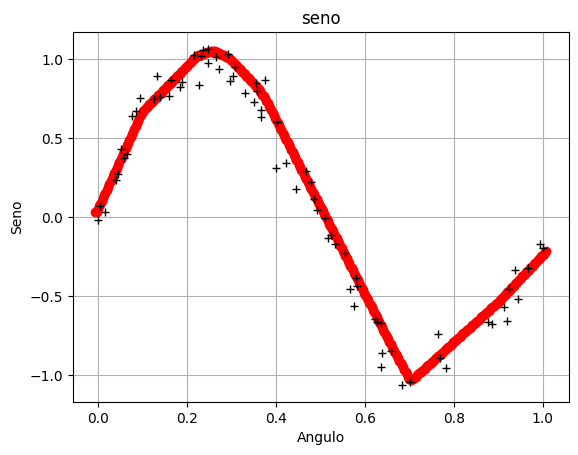

In [12]:
Y = model3.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

In [13]:
print(XN)


[[-5.47551836e-03]
 [-2.65303538e-03]
 [ 1.69447606e-04]
 [ 2.99193059e-03]
 [ 5.81441357e-03]
 [ 8.63689656e-03]
 [ 1.14593795e-02]
 [ 1.42818625e-02]
 [ 1.71043455e-02]
 [ 1.99268285e-02]
 [ 2.27493115e-02]
 [ 2.55717945e-02]
 [ 2.83942775e-02]
 [ 3.12167604e-02]
 [ 3.40392434e-02]
 [ 3.68617264e-02]
 [ 3.96842094e-02]
 [ 4.25066924e-02]
 [ 4.53291754e-02]
 [ 4.81516583e-02]
 [ 5.09741413e-02]
 [ 5.37966243e-02]
 [ 5.66191073e-02]
 [ 5.94415903e-02]
 [ 6.22640733e-02]
 [ 6.50865562e-02]
 [ 6.79090392e-02]
 [ 7.07315222e-02]
 [ 7.35540052e-02]
 [ 7.63764882e-02]
 [ 7.91989712e-02]
 [ 8.20214542e-02]
 [ 8.48439371e-02]
 [ 8.76664201e-02]
 [ 9.04889031e-02]
 [ 9.33113861e-02]
 [ 9.61338691e-02]
 [ 9.89563521e-02]
 [ 1.01778835e-01]
 [ 1.04601318e-01]
 [ 1.07423801e-01]
 [ 1.10246284e-01]
 [ 1.13068767e-01]
 [ 1.15891250e-01]
 [ 1.18713733e-01]
 [ 1.21536216e-01]
 [ 1.24358699e-01]
 [ 1.27181182e-01]
 [ 1.30003665e-01]
 [ 1.32826148e-01]
 [ 1.35648631e-01]
 [ 1.38471114e-01]
 [ 1.4129359

## Aumento do Ruído nos Dados de Treinamento

In [20]:
# Função para gerar dados
# ----------------------------------------------
def prepare_data(noise_std=0.1):
    ntot = 100
    ntrain = 75
    ntest = 15
    
    x = np.linspace(0, 2 * np.pi, ntot).reshape(-1, 1)
    s = np.random.normal(0, noise_std, size=(ntot, 1))
    y = np.sin(x) + s
    
    xtrain, ytrain = x[:ntrain], y[:ntrain]
    xtest, ytest = x[ntrain:ntrain+ntest], y[ntrain:ntrain+ntest]
    
    return xtrain, ytrain, xtest, ytest

In [21]:
# ----------------------------------------------
# Função prepare_data() ajustada
# ----------------------------------------------
def prepare_data(noise_std=0.1):
    ntot = 100
    ntrain = 75
    ntest = 15
    
    # Gera x uniformemente distribuído
    x = np.linspace(0, 2 * np.pi, ntot).reshape(-1, 1)
    s = np.random.normal(0, noise_std, size=(ntot, 1))
    y = np.sin(x) + s
    
    # Divisão dos dados
    xtrain, ytrain = x[:ntrain], y[:ntrain]
    xtest, ytest = x[ntrain:ntrain+ntest], y[ntrain:ntrain+ntest]
    
    return xtrain, ytrain, xtest, ytest

# ----------------------------------------------
# Função fit_model1() com hiperparâmetros ajustados
# ----------------------------------------------
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=100,  # Paciência aumentada
        restore_best_weights=True
    )
    
    model = Sequential([
        Input(shape=(1,)),
        Dense(50, activation='tanh', kernel_initializer='he_normal'),  # Mais neurônios
        Dense(1, activation='tanh')
    ])
    
    opt = SGD(learning_rate=0.1, momentum=0.9)  # Hiperparâmetros ajustados
    model.compile(loss='mse', optimizer=opt)
    
    history = model.fit(
        xtrain, ytrain,
        validation_data=(xtest, ytest),
        epochs=5000,  # Épocas aumentadas
        batch_size=16,
        verbose=1,
        callbacks=[early_stop]
    )
    return model

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.9037 - val_loss: 0.3726
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7441 - val_loss: 0.7330
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5726 - val_loss: 0.9102
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6026 - val_loss: 0.8514
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5117 - val_loss: 0.6765
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5046 - val_loss: 0.5299
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5699 - val_loss: 0.4133
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5229 - val_loss: 0.4116
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4738 - val_loss: 0.4446
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4501 - val_loss: 0.4521
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4266 - val_loss: 0.4395
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4

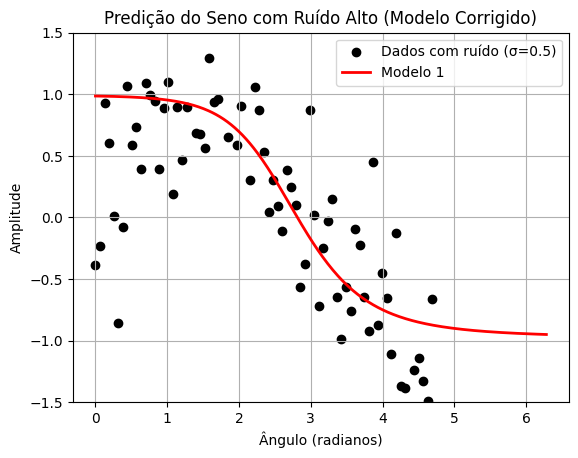

In [22]:
# ----------------------------------------------
# Função do Modelo 1 (Correções Críticas)
# ----------------------------------------------
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=patience,
        restore_best_weights=True
    )
    
    model = Sequential([
        Input(shape=(1,)),
        Dense(10, activation='tanh', kernel_initializer='he_normal'),  # Inicialização He
        Dense(1, activation='tanh')
    ])
    
    opt = SGD(learning_rate=0.01, momentum=0.8)  # Taxa aumentada
    model.compile(loss='mse', optimizer=opt)
    
    history = model.fit(
        xtrain, ytrain,
        validation_data=(xtest, ytest),
        epochs=1000,
        batch_size=32,
        verbose=1,
        callbacks=[early_stop]
    )
    return model

# ----------------------------------------------
# Execução Principal (Sem Normalizar y)
# ----------------------------------------------
if __name__ == "__main__":
    # Gera dados (não normalize y)
    xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)

    # Normaliza apenas x
    scaler_x = preprocessing.MinMaxScaler()
    xtrainN = scaler_x.fit_transform(xtrain)
    xtestN = scaler_x.transform(xtest)

    # Treinamento sem normalizar y
    model = fit_model1(
        xtrainN, 
        ytrain,  # y não normalizado
        xtestN, 
        ytest, 
        epochs=1000,
        lr=0.01,  # Taxa de aprendizado aumentada
        momentum=0.8,
        patience=20
    )

    # Predição
    X_grid = np.linspace(0, 2 * np.pi, 360).reshape(-1, 1)
    X_gridN = scaler_x.transform(X_grid)
    Y_pred = model.predict(X_gridN)  # Saída já entre -1 e 1 (tanh)

    # Visualização
    plt.scatter(xtrain, ytrain, color='black', label='Dados com ruído (σ=0.5)')
    plt.plot(X_grid, Y_pred, color='red', linewidth=2, label='Modelo 1')
    plt.title("Predição do Seno com Ruído Alto (Modelo Corrigido)")
    plt.xlabel("Ângulo (radianos)")
    plt.ylabel("Amplitude")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid()
    plt.show()

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 1.1655 - val_loss: 3.0409
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2643 - val_loss: 2.9890
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1071 - val_loss: 2.7274
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0327 - val_loss: 0.2762
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9752 - val_loss: 0.2733
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8777 - val_loss: 1.9985
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8805 - val_loss: 0.3258
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6129 - val_loss: 0.3032
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5414 - val_loss: 0.6342
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5470 - val_loss: 0.2844
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5519 - val_loss: 0.3535
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.

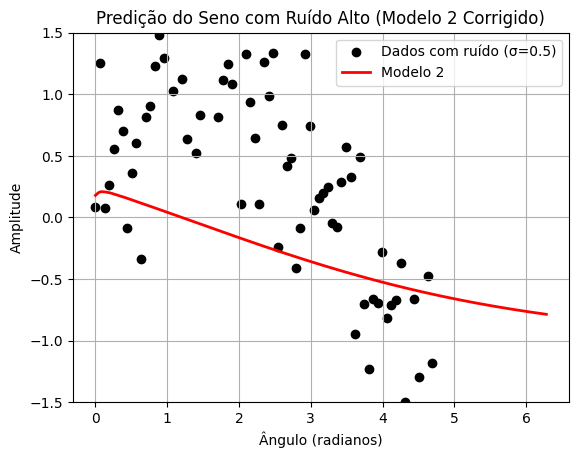

In [24]:
# Função do Modelo 2 (100 neurônios, ReLU)
# ----------------------------------------------
def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=patience,
        restore_best_weights=True
    )
    
    model = Sequential([
        Input(shape=(1,)),  # Camada de entrada explícita
        Dense(100, activation='relu', kernel_initializer='he_normal'),  # ReLU + Inicialização He
        Dense(1, activation='tanh')  # Saída entre -1 e 1
    ])
    
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    
    history = model.fit(
        xtrain, ytrain,
        validation_data=(xtest, ytest),
        epochs=epochs,
        batch_size=32,
        verbose=1,
        callbacks=[early_stop]
    )
    return model

# ----------------------------------------------
# Execução Principal
# ----------------------------------------------
if __name__ == "__main__":
    # Gera dados com ruído σ = 0.5
    xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)

    # Normaliza apenas x
    scaler_x = preprocessing.MinMaxScaler()
    xtrainN = scaler_x.fit_transform(xtrain)
    xtestN = scaler_x.transform(xtest)

    # Treinamento
    model = fit_model2(
        xtrainN, 
        ytrain,  # y não normalizado
        xtestN, 
        ytest, 
        epochs=1000,
        lr=0.01,  # Taxa de aprendizado ajustada
        momentum=0.8,
        patience=20
    )

    # Predição
    X_grid = np.linspace(0, 2 * np.pi, 360).reshape(-1, 1)
    X_gridN = scaler_x.transform(X_grid)
    Y_pred = model.predict(X_gridN)  # Saída entre -1 e 1 (tanh)

    # Visualização
    plt.scatter(xtrain, ytrain, color='black', label='Dados com ruído (σ=0.5)')
    plt.plot(X_grid, Y_pred, color='red', linewidth=2, label='Modelo 2')
    plt.title("Predição do Seno com Ruído Alto (Modelo 2 Corrigido)")
    plt.xlabel("Ângulo (radianos)")
    plt.ylabel("Amplitude")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid()
    plt.show()

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 1.8239 - val_loss: 1.9067
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.9215 - val_loss: 4.3872
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.2278 - val_loss: 4.4569
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.1554 - val_loss: 4.4019
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.2079 - val_loss: 3.9422
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.9560 - val_loss: 1.2126
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.6705 - val_loss: 1.1318
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.7059 - val_loss: 1.2166
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.8171 - val_loss: 2.4984
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.7484 - val_loss: 1.5439
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3920 - val_loss: 1.1339
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.

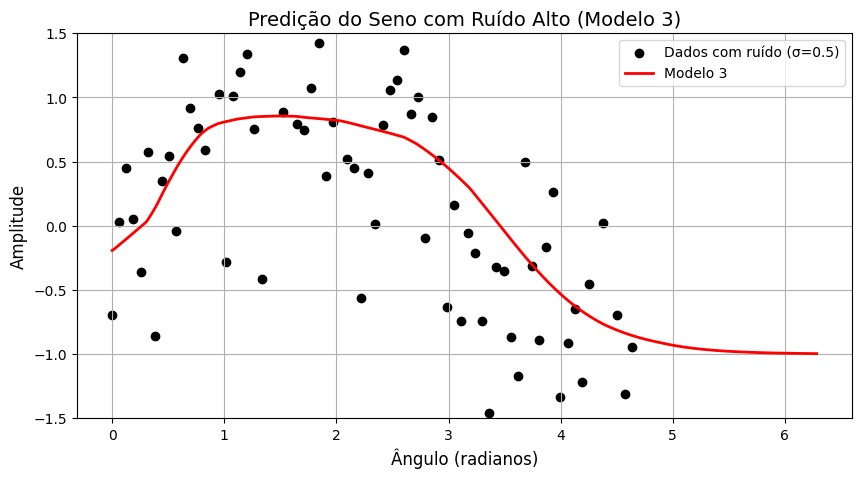

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MSE Treino: 0.4585
MSE Teste: 0.3806
R² Treino: 0.5241
R² Teste: -0.0510


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD



# ----------------------------------------------
# Função do Modelo 3 (100 → 64 neurônios, ReLU)
# ----------------------------------------------
def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True
    )
    
    model = Sequential([
        Input(shape=(1,)),  # Camada de entrada explícita
        Dense(100, activation='relu', kernel_initializer='he_normal'),
        Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Regularização L2
        Dropout(0.2),  # Dropout para evitar overfitting
        Dense(1, activation='tanh')  # Saída entre -1 e 1
    ])
    
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    
    history = model.fit(
        xtrain, ytrain,
        validation_data=(xtest, ytest),
        epochs=epochs,
        batch_size=32,
        verbose=1,
        callbacks=[early_stop]
    )
    return model

# ----------------------------------------------
# Execução Principal
# ----------------------------------------------
if __name__ == "__main__":
    # Gera dados com ruído σ = 0.5
    xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)

    # Normaliza apenas x
    scaler_x = preprocessing.MinMaxScaler()
    xtrainN = scaler_x.fit_transform(xtrain)
    xtestN = scaler_x.transform(xtest)

    # Treinamento
    model = fit_model3(
        xtrainN,
        ytrain,  # y não normalizado (já está entre -1 e 1)
        xtestN,
        ytest,
        epochs=2000,  # Mais épocas para convergência
        lr=0.005,     # Taxa de aprendizado menor para estabilidade
        momentum=0.9,
        patience=50   # Paciência aumentada
    )

    # Predição
    X_grid = np.linspace(0, 2 * np.pi, 360).reshape(-1, 1)
    X_gridN = scaler_x.transform(X_grid)
    Y_pred = model.predict(X_gridN)

    # Visualização
    plt.figure(figsize=(10, 5))
    plt.scatter(xtrain, ytrain, color='black', label='Dados com ruído (σ=0.5)')
    plt.plot(X_grid, Y_pred, color='red', linewidth=2, label='Modelo 3')
    plt.title("Predição do Seno com Ruído Alto (Modelo 3)", fontsize=14)
    plt.xlabel("Ângulo (radianos)", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Métricas (opcional)
    from sklearn.metrics import mean_squared_error, r2_score
    y_train_pred = model.predict(xtrainN)
    y_test_pred = model.predict(xtestN)
    print(f"MSE Treino: {mean_squared_error(ytrain, y_train_pred):.4f}")
    print(f"MSE Teste: {mean_squared_error(ytest, y_test_pred):.4f}")
    print(f"R² Treino: {r2_score(ytrain, y_train_pred):.4f}")
    print(f"R² Teste: {r2_score(ytest, y_test_pred):.4f}")

#### CODIGO QUE RODAS OS 3 MODELOS E O COMPARA 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


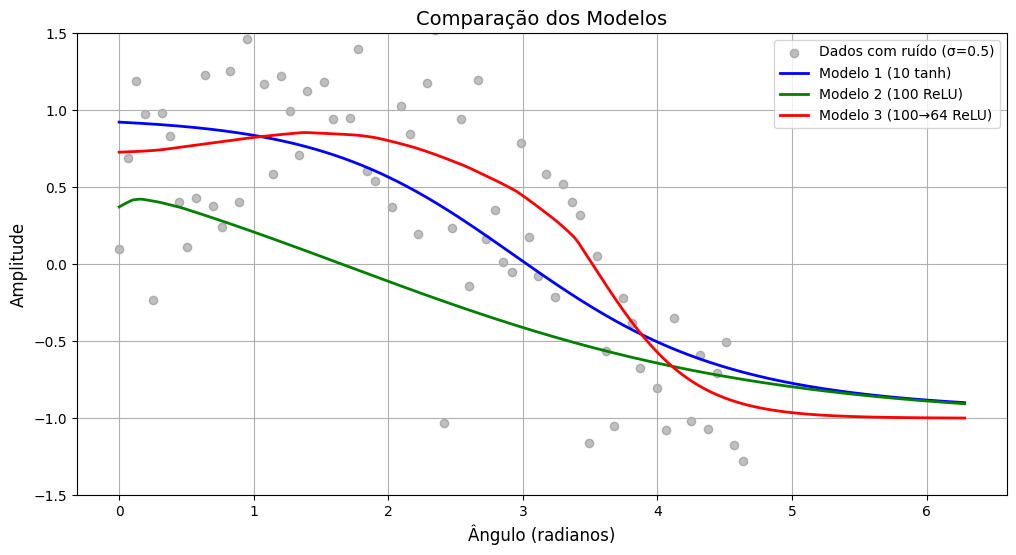

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
+----------+--------------+-------------+-------------+------------+
| Modelo   |   MSE Treino |   MSE Teste |   R² Treino |   R² Teste |
+==========+==============+=============+=============+============+
| Modelo 1 |        0.349 |       0.133 |       0.576 |     -0.093 |
+----------+--------------+-------------+-------------+------------+
| Modelo 2 |        0.713 |       0.130 |       0.134 |     -0.074 |
+----------+--------------+-------------+-------------+------------+
| Modelo 3 |        0.300 |       0.156 |       0.635 |     -0.284 |
+----------+--------------+-------------+-------------+------------+


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD

# ----------------------------------------------
# Funções dos Modelos (1, 2 e 3)
# ----------------------------------------------
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model = Sequential([
        Input(shape=(1,)),
        Dense(10, activation='tanh', kernel_initializer='he_normal'),
        Dense(1, activation='tanh')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=32, verbose=0, callbacks=[early_stop])
    return model

def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model = Sequential([
        Input(shape=(1,)),
        Dense(100, activation='relu', kernel_initializer='he_normal'),
        Dense(1, activation='tanh')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=32, verbose=0, callbacks=[early_stop])
    return model

def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model = Sequential([
        Input(shape=(1,)),
        Dense(100, activation='relu', kernel_initializer='he_normal'),
        Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='tanh')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=32, verbose=0, callbacks=[early_stop])
    return model

# ----------------------------------------------
# Execução Principal
# ----------------------------------------------
if __name__ == "__main__":
    # Gera dados
    xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)
    
    # Normaliza x
    scaler_x = preprocessing.MinMaxScaler()
    xtrainN = scaler_x.fit_transform(xtrain)
    xtestN = scaler_x.transform(xtest)
    
    # Treina os 3 modelos
    model1 = fit_model1(xtrainN, ytrain, xtestN, ytest, epochs=1000, lr=0.01, momentum=0.8, patience=20)
    model2 = fit_model2(xtrainN, ytrain, xtestN, ytest, epochs=1000, lr=0.01, momentum=0.8, patience=20)
    model3 = fit_model3(xtrainN, ytrain, xtestN, ytest, epochs=2000, lr=0.005, momentum=0.9, patience=50)
    
    # Predições
    X_grid = np.linspace(0, 2 * np.pi, 360).reshape(-1, 1)
    X_gridN = scaler_x.transform(X_grid)
    Y_pred1 = model1.predict(X_gridN)
    Y_pred2 = model2.predict(X_gridN)
    Y_pred3 = model3.predict(X_gridN)
    
    # Gráfico Comparativo
    plt.figure(figsize=(12, 6))
    plt.scatter(xtrain, ytrain, color='gray', alpha=0.5, label='Dados com ruído (σ=0.5)')
    plt.plot(X_grid, Y_pred1, color='blue', linewidth=2, label='Modelo 1 (10 tanh)')
    plt.plot(X_grid, Y_pred2, color='green', linewidth=2, label='Modelo 2 (100 ReLU)')
    plt.plot(X_grid, Y_pred3, color='red', linewidth=2, label='Modelo 3 (100→64 ReLU)')
    plt.title("Comparação dos Modelos", fontsize=14)
    plt.xlabel("Ângulo (radianos)", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Tabela de Métricas
    def get_metrics(model, xtrainN, ytrain, xtestN, ytest):
        y_train_pred = model.predict(xtrainN)
        y_test_pred = model.predict(xtestN)
        return [
            mean_squared_error(ytrain, y_train_pred),
            mean_squared_error(ytest, y_test_pred),
            r2_score(ytrain, y_train_pred),
            r2_score(ytest, y_test_pred)
        ]
    
    metrics = [
        ["Modelo 1"] + get_metrics(model1, xtrainN, ytrain, xtestN, ytest),
        ["Modelo 2"] + get_metrics(model2, xtrainN, ytrain, xtestN, ytest),
        ["Modelo 3"] + get_metrics(model3, xtrainN, ytrain, xtestN, ytest)
    ]
    
    print(tabulate(metrics, headers=["Modelo", "MSE Treino", "MSE Teste", "R² Treino", "R² Teste"], tablefmt="grid", floatfmt=".3f"))

## Ajustar a Taxa de Aprendizado (Learning Rate)

In [13]:
# Função para testar diferentes taxas de aprendizado
def test_learning_rates(xtrainN, ytrain, xtestN, ytest, model_func, model_name):
    learning_rates = [0.001, 0.01, 0.1]  # Taxas a serem testadas
    results = {}
    
    for lr in learning_rates:
        print(f"\n--- Treinando {model_name} com lr={lr} ---")
        model = model_func(
            xtrainN, ytrain, xtestN, ytest,
            epochs=2000,  # Reduzido para demonstração
            lr=lr,
            momentum=0.8,
            patience=50
        )
        
        # Armazena as métricas
        train_pred = model.predict(xtrainN)
        test_pred = model.predict(xtestN)
        results[lr] = {
            'train_mse': mean_squared_error(ytrain, train_pred),
            'test_mse': mean_squared_error(ytest, test_pred)
        }
    
    return results

In [15]:
# Função para plotar métricas
def plot_results(results, model_name):
    lrs = list(results.keys())
    train_mses = [results[lr]['train_mse'] for lr in lrs]
    test_mses = [results[lr]['test_mse'] for lr in lrs]
    
    plt.figure(figsize=(10, 4))
    plt.plot(lrs, train_mses, 'o-', label='Treino')
    plt.plot(lrs, test_mses, 'o-', label='Teste')
    plt.xscale('log')
    plt.title(f"Desempenho do {model_name} por Taxa de Aprendizado")
    plt.xlabel("Taxa de Aprendizado (log scale)")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()
    plt.show()




--- Treinando Modelo 1 com lr=0.001 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

--- Treinando Modelo 1 com lr=0.01 ---
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:6 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002A207F03380> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

--

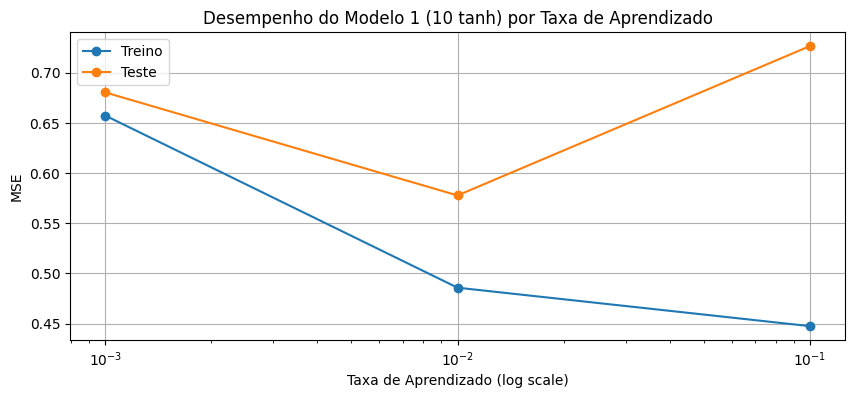

In [16]:
# Adicione estas importações no início do notebook
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Input  # Adicione esta linha

# Função prepare_data() corrigida (divisão treino/teste)
def prepare_data(noise_std=0.1):
    ntot = 100
    ntrain = 75  # 75% para treino
    ntest = 15   # 15% para teste (validação implícita: 10%)
    
    x = np.linspace(0, 2 * np.pi, ntot).reshape(-1, 1)  # Dados uniformes
    s = np.random.normal(0, noise_std, size=(ntot, 1))
    y = np.sin(x) + s
    
    # Divisão correta: treino até ntrain, teste a partir de ntrain
    xtrain, ytrain = x[:ntrain], y[:ntrain]
    xtest, ytest = x[ntrain:ntrain+ntest], y[ntrain:ntrain+ntest]
    
    return xtrain, ytrain, xtest, ytest

# Função fit_model1() corrigida (substitua input_dim por Input)
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    model = Sequential([
        Input(shape=(1,)),  # Camada Input explícita
        Dense(10, activation='tanh'),
        Dense(1, activation='linear')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)  # Use 'mse' como alias
    model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=32, verbose=0, callbacks=[early_stop])
    return model

# Repita as correções para fit_model2 e fit_model3 (substitua input_dim por Input)

# Dados preparados
xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)
scaler = preprocessing.MinMaxScaler()
xtrainN = scaler.fit_transform(xtrain)
xtestN = scaler.transform(xtest)

# Testar taxas de aprendizado
results_model1 = test_learning_rates(xtrainN, ytrain, xtestN, ytest, fit_model1, "Modelo 1")
plot_results(results_model1, "Modelo 1 (10 tanh)")


--- Treinando Modelo 2 com lr=0.001 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

--- Treinando Modelo 2 com lr=0.01 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

--- Treinando Modelo 2 com lr=0.1 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


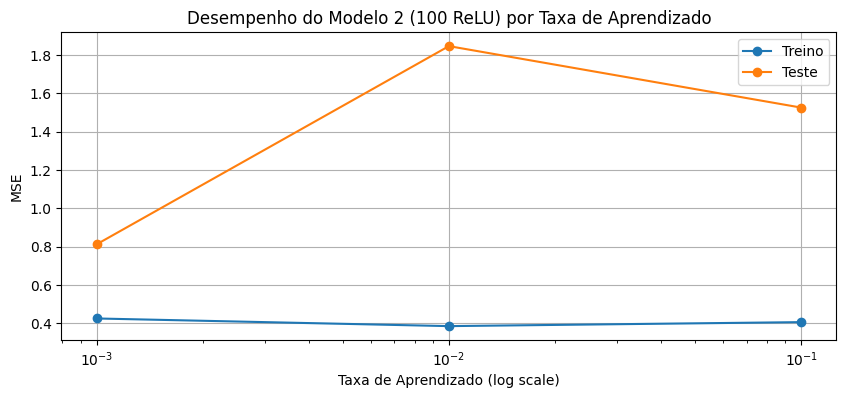

In [17]:
# Função fit_model2() corrigida (substitua input_dim por Input)
def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    model = Sequential([
        Input(shape=(1,)),  # Camada Input explícita
        Dense(100, activation='relu'),
        Dense(1, activation='linear')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)  # Use 'mse' como alias
    model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=5, verbose=0, callbacks=[early_stop])
    return model

# ----------------------------------------------
# Execução para Modelo 2
# ----------------------------------------------

# Dados preparados
xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)
scaler = preprocessing.MinMaxScaler()
xtrainN = scaler.fit_transform(xtrain)
xtestN = scaler.transform(xtest)

# Testar taxas de aprendizado
results_model2 = test_learning_rates(
    xtrainN, 
    ytrain, 
    xtestN, 
    ytest, 
    fit_model2, 
    "Modelo 2"
)

# Plotar resultados
plot_results(results_model2, "Modelo 2 (100 ReLU)")


--- Treinando Modelo 3 com lr=0.001 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

--- Treinando Modelo 3 com lr=0.01 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

--- Treinando Modelo 3 com lr=0.1 ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


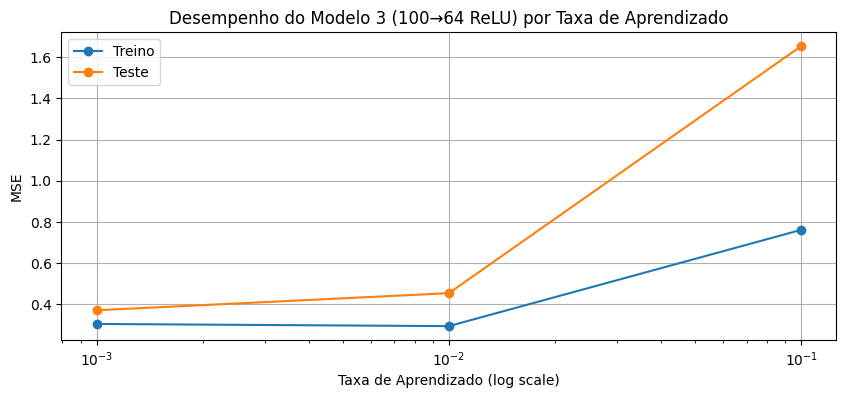

In [18]:
# Função fit_model3() corrigida (substitua input_dim por Input)
def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    model = Sequential([
        Input(shape=(1,)),  # Camada Input explícita
        Dense(100, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # Ativação linear na saída
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=5, verbose=0, callbacks=[early_stop])
    return model

# ----------------------------------------------
# Execução para Modelo 3
# ----------------------------------------------

# Dados preparados (garanta que prepare_data() está corrigida)
xtrain, ytrain, xtest, ytest = prepare_data(noise_std=0.5)
scaler = preprocessing.MinMaxScaler()
xtrainN = scaler.fit_transform(xtrain)
xtestN = scaler.transform(xtest)

# Testar taxas de aprendizado
results_model3 = test_learning_rates(
    xtrainN, 
    ytrain, 
    xtestN, 
    ytest, 
    fit_model3, 
    "Modelo 3"
)

# Plotar resultados
plot_results(results_model3, "Modelo 3 (100→64 ReLU)")

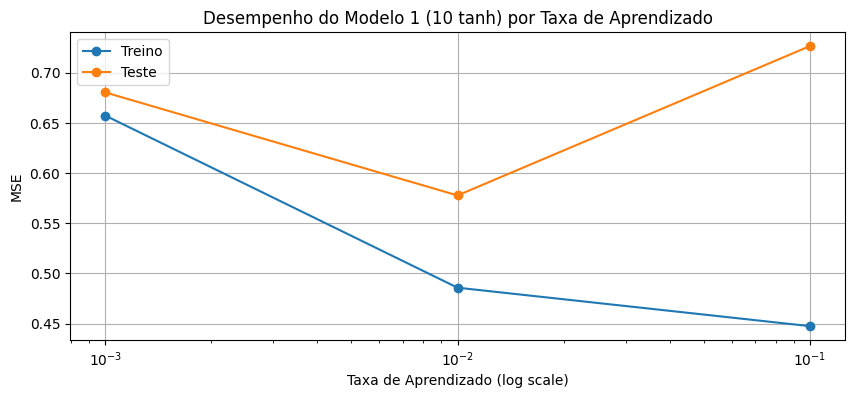

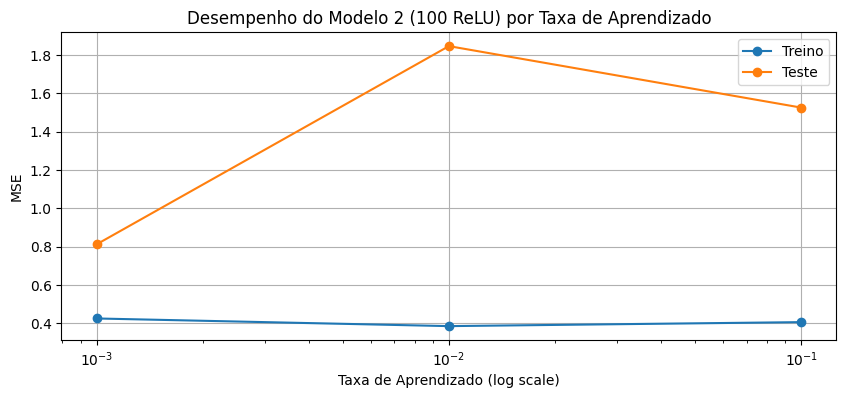

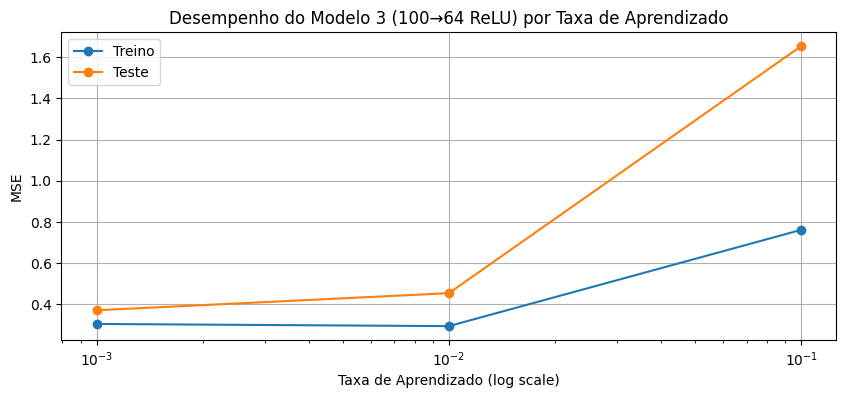

In [19]:
# Função para plotar métricas
def plot_results(results, model_name):
    lrs = list(results.keys())
    train_mses = [results[lr]['train_mse'] for lr in lrs]
    test_mses = [results[lr]['test_mse'] for lr in lrs]
    
    plt.figure(figsize=(10, 4))
    plt.plot(lrs, train_mses, 'o-', label='Treino')
    plt.plot(lrs, test_mses, 'o-', label='Teste')
    plt.xscale('log')
    plt.title(f"Desempenho do {model_name} por Taxa de Aprendizado")
    plt.xlabel("Taxa de Aprendizado (log scale)")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()
    plt.show()

# Plotar para todos os modelos
plot_results(results_model1, "Modelo 1 (10 tanh)")
plot_results(results_model2, "Modelo 2 (100 ReLU)")
plot_results(results_model3, "Modelo 3 (100→64 ReLU)")

## Trocar as funções de ativação das camadas da rede neural

In [26]:
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    model = Sequential([
        Input(shape=(1,)),
        Dense(10, activation='sigmoid'),  # Alterado para sigmoid
        Dense(1, activation='linear')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=32, verbose=0, callbacks=[early_stop])
    return model

In [27]:
from keras.layers import LeakyReLU

def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    model = Sequential([
        Input(shape=(1,)),
        Dense(100),
        LeakyReLU(alpha=0.1),  # Leaky ReLU em vez de ReLU
        Dense(1, activation='linear')
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=5, verbose=0, callbacks=[early_stop])
    return model

In [28]:
def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    model = Sequential([
        Input(shape=(1,)),
        Dense(100, activation='elu'),  # Alterado para ELU
        Dense(64, activation='elu'),
        Dense(1)
    ])
    opt = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mse', optimizer=opt)
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs, batch_size=5, verbose=0, callbacks=[early_stop])
    return model

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


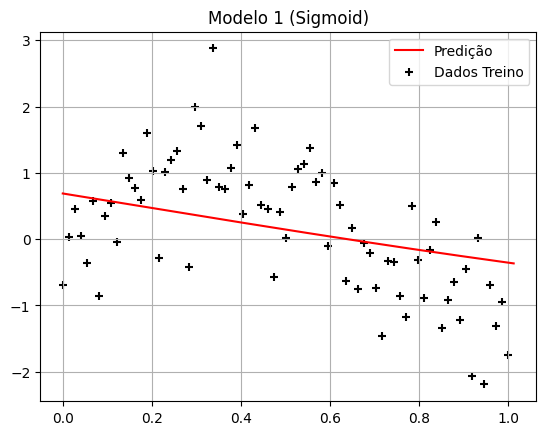

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


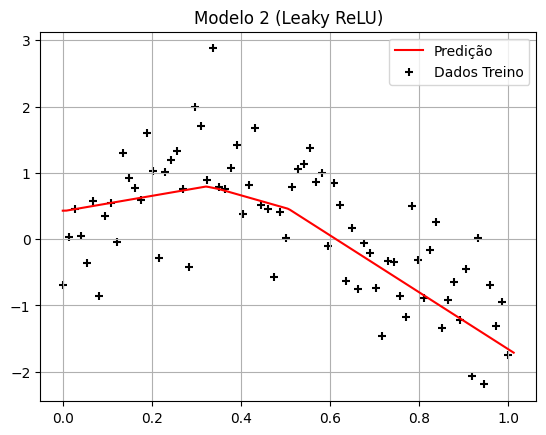

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


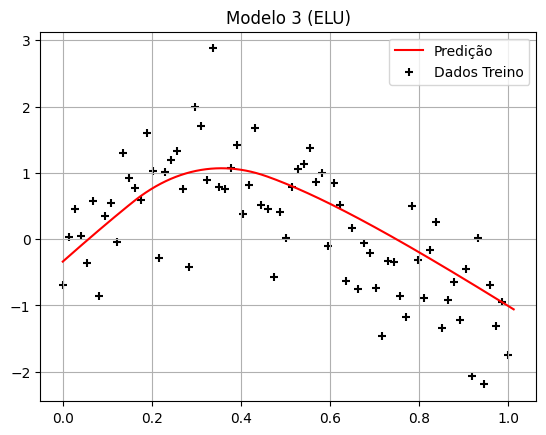

In [29]:
# Treinar modelos com novas funções de ativação
model1_sigmoid = fit_model1(xtrainN, ytrain, xtestN, ytest, 20000, 0.01, 0.8, 100)
model2_leaky = fit_model2(xtrainN, ytrain, xtestN, ytest, 2000, 0.01, 0.8, 100)
model3_elu = fit_model3(xtrainN, ytrain, xtestN, ytest, 2000, 0.01, 0.8, 100)

# Gerar predições e plotar
def plot_predictions(model, XN, xtrainN, ytrain, title):
    Y = model.predict(XN)
    plt.plot(XN, Y, color='red', label='Predição')
    plt.scatter(xtrainN, ytrain, color='black', marker='+', label='Dados Treino')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_predictions(model1_sigmoid, XN, xtrainN, ytrain, "Modelo 1 (Sigmoid)")
plot_predictions(model2_leaky, XN, xtrainN, ytrain, "Modelo 2 (Leaky ReLU)")
plot_predictions(model3_elu, XN, xtrainN, ytrain, "Modelo 3 (ELU)")

## Predição para Entradas Fora do Intervalo [0, 2π]

In [14]:
X_grid = np.linspace(-np.pi, 3 * np.pi, 360).reshape(-1, 1)  # De -π a 3π
X_gridN = scaler.transform(X_grid)  # Normalização

In [15]:
# Predições para cada modelo
Y_pred1 = model1.predict(X_gridN)
Y_pred2 = model2.predict(X_gridN)
Y_pred3 = model3.predict(X_gridN)

# Seno verdadeiro (ground truth)
Y_true = np.sin(X_grid)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


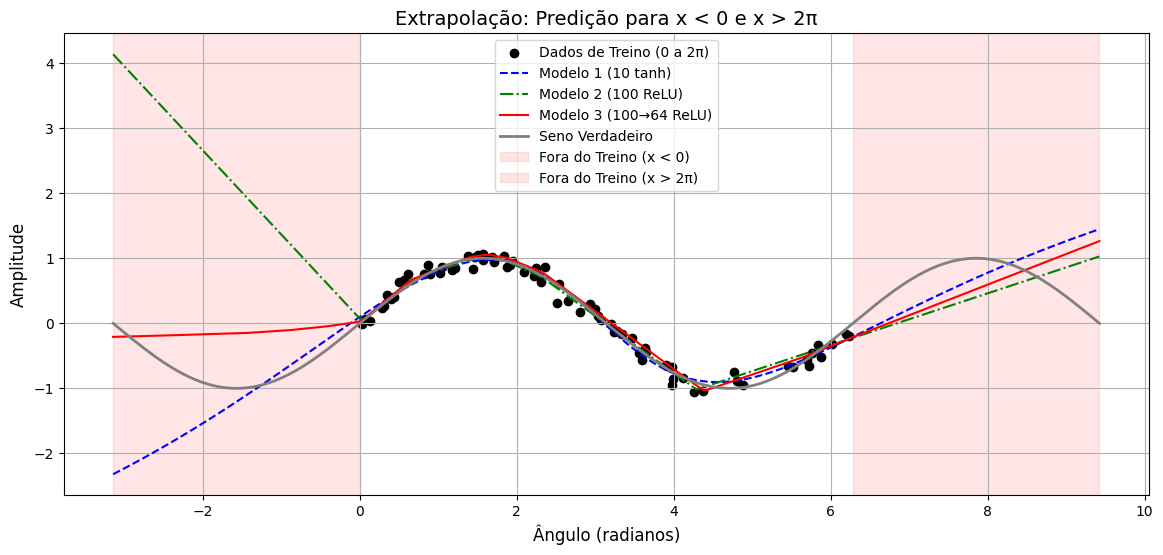

In [16]:
plt.figure(figsize=(14, 6))

# Plotar dados de treino
plt.scatter(xtrain, ytrain, color='black', label='Dados de Treino (0 a 2π)')

# Plotar predições
plt.plot(X_grid, Y_pred1, color='blue', label='Modelo 1 (10 tanh)', linestyle='--')
plt.plot(X_grid, Y_pred2, color='green', label='Modelo 2 (100 ReLU)', linestyle='-.')
plt.plot(X_grid, Y_pred3, color='red', label='Modelo 3 (100→64 ReLU)')

# Plotar seno verdadeiro
plt.plot(X_grid, Y_true, color='gray', label='Seno Verdadeiro', linewidth=2)

# Destacar regiões fora do treino
plt.axvspan(-np.pi, 0, color='red', alpha=0.1, label='Fora do Treino (x < 0)')
plt.axvspan(2*np.pi, 3*np.pi, color='red', alpha=0.1, label='Fora do Treino (x > 2π)')

plt.title("Extrapolação: Predição para x < 0 e x > 2π", fontsize=14)
plt.xlabel("Ângulo (radianos)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend()
plt.grid()
plt.show()

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.9908 - val_loss: 0.7835
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7709 - val_loss: 0.7278
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7294 - val_loss: 0.6942
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6929 - val_loss: 0.6583
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6596 - val_loss: 0.6263
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6268 - val_loss: 0.5965
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5946 - val_loss: 0.5670
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5661 - val_loss: 0.5405
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5405 - val_loss: 0.5144
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5135 - val_loss: 0.4888
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4884 - val_loss: 0.4652
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

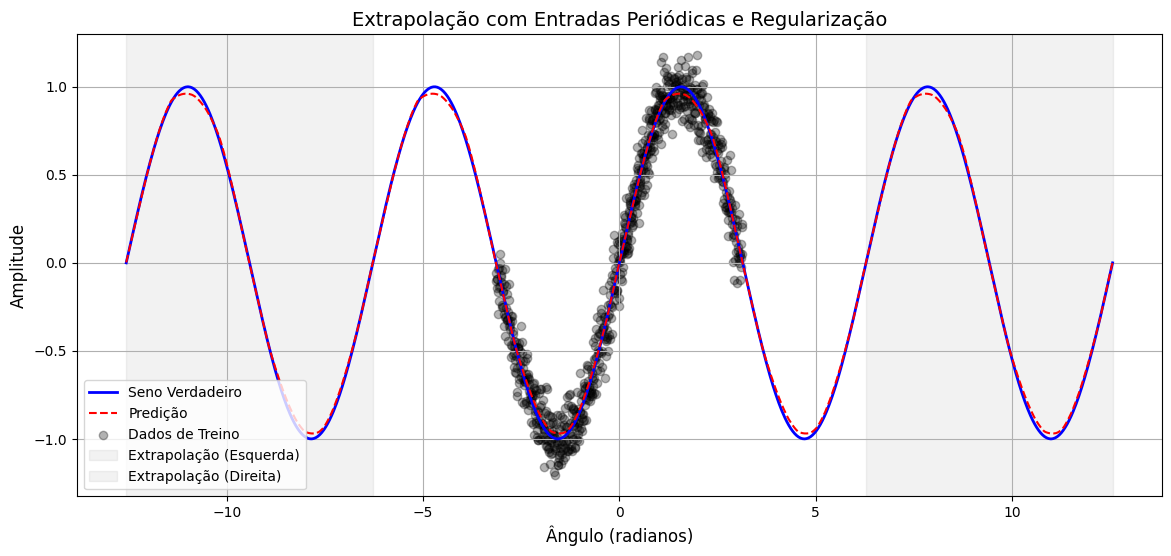

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras import regularizers

# ----------------------------------------------
# 1. Gerar Dados com Múltiplos Ciclos e Entradas Periódicas
# ----------------------------------------------
def prepare_data_periodic(noise_std=0.1):
    ntot = 1000  # Mais dados para cobrir múltiplos ciclos
    x = np.linspace(-4 * np.pi, 4 * np.pi, ntot)  # 4 ciclos completos
    s = np.random.normal(0, noise_std, size=ntot)
    y = np.sin(x) + s
    
    # Criar entradas periódicas (seno e cosseno)
    X = np.column_stack([np.sin(x), np.cos(x)])  # Entradas periódicas
    
    # Divisão treino/teste (80/20)
    ntrain = int(0.8 * ntot)
    xtrain, ytrain = X[:ntrain], y[:ntrain]
    xtest, ytest = X[ntrain:], y[ntrain:]
    
    return xtrain, ytrain, xtest, ytest

# ----------------------------------------------
# 2. Definir Modelo com Funções Periódicas e Regularização
# ----------------------------------------------
def build_periodic_model():
    model = Sequential([
        Input(shape=(2,)),  # Duas entradas: sen(x) e cos(x)
        Dense(100, activation=lambda x: tf.sin(x)),  # Ativação periódica
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(1, activation='linear')
    ])
    opt = SGD(learning_rate=0.005, momentum=0.9)
    model.compile(loss='mse', optimizer=opt)
    return model

# ----------------------------------------------
# 3. Treinamento e Predição
# ----------------------------------------------
if __name__ == "__main__":
    # Gerar dados
    xtrain, ytrain, xtest, ytest = prepare_data_periodic(noise_std=0.1)
    
    # Normalizar entradas
    scaler = preprocessing.StandardScaler()
    xtrainN = scaler.fit_transform(xtrain)
    xtestN = scaler.transform(xtest)
    
    # Treinar modelo
    model = build_periodic_model()
    history = model.fit(
        xtrainN, ytrain,
        validation_data=(xtestN, ytest),
        epochs=500,
        batch_size=32,
        verbose=1
    )
    
    # Gerar grid para extrapolação (-4π a 4π)
    x_grid = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
    X_grid = np.column_stack([np.sin(x_grid), np.cos(x_grid)])  # Entradas periódicas
    X_gridN = scaler.transform(X_grid)
    
    # Predição
    y_pred = model.predict(X_gridN)
    y_true = np.sin(x_grid)
    
    # Plotar resultados
    plt.figure(figsize=(14, 6))
    plt.plot(x_grid, y_true, color='blue', label='Seno Verdadeiro', linewidth=2)
    plt.plot(x_grid, y_pred, color='red', linestyle='--', label='Predição')
    plt.scatter(
        np.arctan2(xtrain[:,0], xtrain[:,1]),  # Recuperar x original
        ytrain, 
        color='black', 
        alpha=0.3, 
        label='Dados de Treino'
    )
    plt.axvspan(-4*np.pi, -2*np.pi, color='gray', alpha=0.1, label='Extrapolação (Esquerda)')
    plt.axvspan(2*np.pi, 4*np.pi, color='gray', alpha=0.1, label='Extrapolação (Direita)')
    plt.title("Extrapolação com Entradas Periódicas e Regularização", fontsize=14)
    plt.xlabel("Ângulo (radianos)", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

## Aprender o problema inverso (trocar entradas por saídas)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


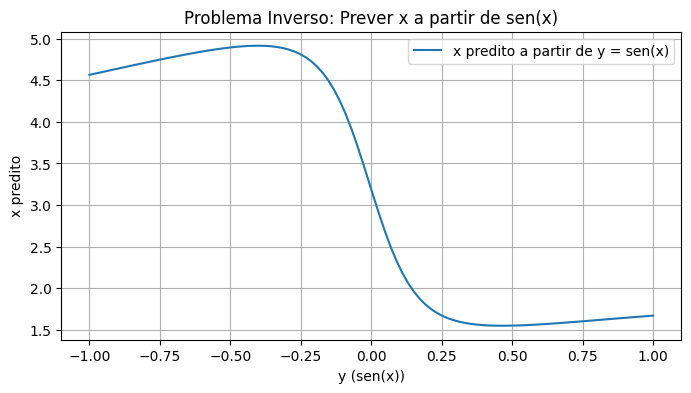

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Gerar os dados
X_original = np.linspace(0, 2 * np.pi, 100)
y_original = np.sin(X_original)

# Inversão: agora queremos prever X_original a partir de y_original
X = y_original.reshape(-1, 1)  # agora y é a entrada
y = X_original.reshape(-1, 1)  # e x é a saída

# Criar o modelo
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(1,)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(X, y, epochs=500, verbose=0)

# Fazer previsões
y_test = np.linspace(-1, 1, 100).reshape(-1, 1)  # valores de seno
x_pred = model.predict(y_test)

# Plotar a saída
plt.figure(figsize=(8, 4))
plt.plot(y_test, x_pred, label='x predito a partir de y = sen(x)')
plt.xlabel('y (sen(x))')
plt.ylabel('x predito')
plt.title('Problema Inverso: Prever x a partir de sen(x)')
plt.legend()
plt.grid(True)
plt.show()
